In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

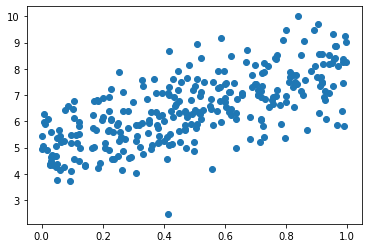

In [15]:
x = torch.rand(300, requires_grad=True)
y = 3*x + 5
y = y + torch.randn(300)

plt.scatter(x.detach().numpy(), y.detach().numpy())

In [16]:
import torch.nn as nn

w = nn.Parameter(torch.randn(1))
b = nn.Parameter(torch.randn(1))

def forward(x):
    y_pred = w * x + b
    return y_pred

def mse(y, y_pred):
    return ((y - y_pred)**2).mean()

optimizer = torch.optim.SGD([w, b], lr=0.1)

for i in range(100):
    y_pred = forward(x)
    loss = mse(y, y_pred)
    loss.backward(retain_graph=True) # compute gradient
    optimizer.step()
    optimizer.zero_grad()
    if i % 10 == 0:
        print(loss.item())

print(w.item(), b.item())

40.251190185546875
1.115606427192688
0.9768139719963074
0.9612734913825989
0.9496483206748962
0.9407466650009155
0.9339295625686646
0.9287090301513672
0.9247111082077026
0.9216493964195251
2.797346591949463 5.1052727699279785


In [27]:
x = torch.rand((300,100), requires_grad=True)
w_true = torch.randn((100,1))
b_true = 5
y = x@w_true + b_true
y = y + torch.randn(300)
# y = y + torch.randn(300)

# plt.scatter(x.detach().numpy(), y.detach().numpy())

In [28]:
import torch.nn as nn

w = nn.Parameter(torch.randn(100))
b = nn.Parameter(torch.randn(1))

def forward(x):
    y_pred = x@w + b
    return y_pred

def mse(y, y_pred):
    return ((y - y_pred)**2).mean()

optimizer = torch.optim.SGD([w, b], lr=0.1)

for i in range(100):
    y_pred = forward(x)
    loss = mse(y, y_pred)
    loss.backward(retain_graph=True) # compute gradient
    optimizer.step()
    optimizer.zero_grad()
    if i % 10 == 0:
        print(loss.item())

print(w.item(), b.item())

182.5567169189453
571100526280704.0
1.9840004517503946e+27
inf
inf
inf
inf
nan
nan
nan


ValueError: only one element tensors can be converted to Python scalars